In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
%matplotlib inline

In [2]:
!pip install catboost

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Employee Attrition/train_.csv')
dft = pd.read_csv('/content/drive/MyDrive/Employee Attrition/test_.csv')

In [5]:
train = df.copy()
test = dft.copy()

In [6]:
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [8]:
test.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [9]:
# merging as nothing has given and it has relation with train dataset
test = pd.merge(train , test, on='Emp_ID')

In [10]:
test.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
1,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
2,2017-08-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,0,1
3,2017-09-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,0,1
4,2017-10-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,0,2


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8588 entries, 0 to 8587
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                8588 non-null   object
 1   Emp_ID                8588 non-null   int64 
 2   Age                   8588 non-null   int64 
 3   Gender                8588 non-null   object
 4   City                  8588 non-null   object
 5   Education_Level       8588 non-null   object
 6   Salary                8588 non-null   int64 
 7   Dateofjoining         8588 non-null   object
 8   LastWorkingDate       0 non-null      object
 9   Joining Designation   8588 non-null   int64 
 10  Designation           8588 non-null   int64 
 11  Total Business Value  8588 non-null   int64 
 12  Quarterly Rating      8588 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 939.3+ KB


In [12]:
# Data Cleaning ...

In [13]:
train['Reporting_date'] = pd.to_datetime(train['MMM-YY'])
train['Gender'] = pd.get_dummies(train['Gender'])

set(train['Education_Level'] )
train['Education_Level'] =  train['Education_Level'].map({'Bachelor':2, 'College':1, 'Master':3}) 


train['Date_of_joining'] = train['Dateofjoining'].apply(lambda x : pd.to_datetime(x))
train['LastWorkingDate'].isnull().sum()
#filling nan values
train['LastWorkingDate'].fillna(0,inplace = True )

# setting target values by considering last day of job as leaving
train['target'] = train['LastWorkingDate'].apply(lambda x :   'working' if x==0 else 'resigned')

train['Last_Working_Date'] = train['LastWorkingDate'].apply(lambda x : pd.to_datetime(x))

train.drop(['MMM-YY','LastWorkingDate','Dateofjoining'],inplace = True , axis = 1)

min(train['Reporting_date'])
max(train['Reporting_date'])

train['target'] = train['target'].apply(lambda x :  0 if x=='working' else 1)

In [14]:
train.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Reporting_date,Date_of_joining,target,Last_Working_Date
0,1,28,0,C23,3,57387,1,1,2381060,2,2016-01-01,2015-12-24,0,1970-01-01
1,1,28,0,C23,3,57387,1,1,-665480,2,2016-02-01,2015-12-24,0,1970-01-01
2,1,28,0,C23,3,57387,1,1,0,2,2016-03-01,2015-12-24,1,2016-03-11
3,2,31,0,C7,3,67016,2,2,0,1,2017-11-01,2017-11-06,0,1970-01-01
4,2,31,0,C7,3,67016,2,2,0,1,2017-12-01,2017-11-06,0,1970-01-01


In [15]:
# Feature engineering.....

In [16]:
# Education level of each employee
education = train.groupby(['Emp_ID','City'])['Education_Level'].max()
education = education.to_frame(name = 'Education')
education = education.reset_index()
emp_id = education['Emp_ID']

# Average age of each employees
age = train.groupby(['Emp_ID'])['Age'].mean().round(2)
age = age.to_frame(name = 'Age')
age = age.reset_index()

# Total salary given to each employee
salary = train.groupby('Emp_ID')['Salary'].sum()
salary = salary.to_frame(name = 'Total_salary')
salary = salary.reset_index()

# Change in designation since joining
joining_designation = train.groupby('Emp_ID')['Joining Designation'].min()
current_designation = train.groupby('Emp_ID')['Designation'].max()
change_in_designation = current_designation - joining_designation
change_in_designation = change_in_designation.to_frame(name = 'Change_in_designation')
change_in_designation = change_in_designation.reset_index()

# Average quartely rating
quaterly_rating = train.groupby('Emp_ID')['Quarterly Rating'].mean().round(2)
quaterly_rating = quaterly_rating.to_frame(name = 'Quaterly_rating')
quaterly_rating = quaterly_rating.reset_index()

# Business done by each employee and its city
total_business =  train.groupby(['Emp_ID' ])['Total Business Value'].sum()
total_business = total_business.to_frame(name = 'Total_business')
total_business = total_business.reset_index()

# Total working in office since joining
joining_date = train.groupby('Emp_ID')['Date_of_joining'].min()
reporting_date =  train.groupby('Emp_ID')['Reporting_date'].max()
total_days_in_office = (reporting_date - joining_date).dt.days
total_days_in_office = total_days_in_office.to_frame(name = 'Total_days_in_office')
total_days_in_office = total_days_in_office.reset_index()

# employees attrition or not assigning
target = train.groupby('Emp_ID')['target'].max()
target = target.to_frame(name = 'Target')
target = target.reset_index()

In [17]:
train_df = pd.concat([education,age,salary,change_in_designation,quaterly_rating,
                 total_business,total_days_in_office,target], axis=1)
train_df.drop('Emp_ID',axis = 1, inplace=True)

In [18]:
train_df.head()

,City,Education,Age,Total_salary,Change_in_designation,Quaterly_rating,Total_business,Total_days_in_office,Target
0,C23,3,28.0,172161,0,2.0,1715580,68,1
1,C7,3,31.0,134032,0,1.0,0,25,0
2,C13,3,43.0,328015,0,1.0,350000,115,1
3,C9,1,29.0,139104,0,1.0,120360,52,1
4,C11,2,31.0,393640,0,1.6,1265000,123,0


In [19]:
city = pd.get_dummies(train_df['City'] , prefix = 'City')
city.head()

,City_C1,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
train_df.drop('City' , axis =1 , inplace = True)
train_df = pd.concat([train_df , city] ,axis =1)


In [21]:
target = train_df.pop('Target')
train_df.insert(len(train_df.columns),'Target',target)

In [22]:
train_df.head()

,Education,Age,Total_salary,Change_in_designation,Quaterly_rating,Total_business,Total_days_in_office,City_C1,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Target
0,3,28.0,172161,0,2.0,1715580,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,31.0,134032,0,1.0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,43.0,328015,0,1.0,350000,115,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,29.0,139104,0,1.0,120360,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,2,31.0,393640,0,1.6,1265000,123,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


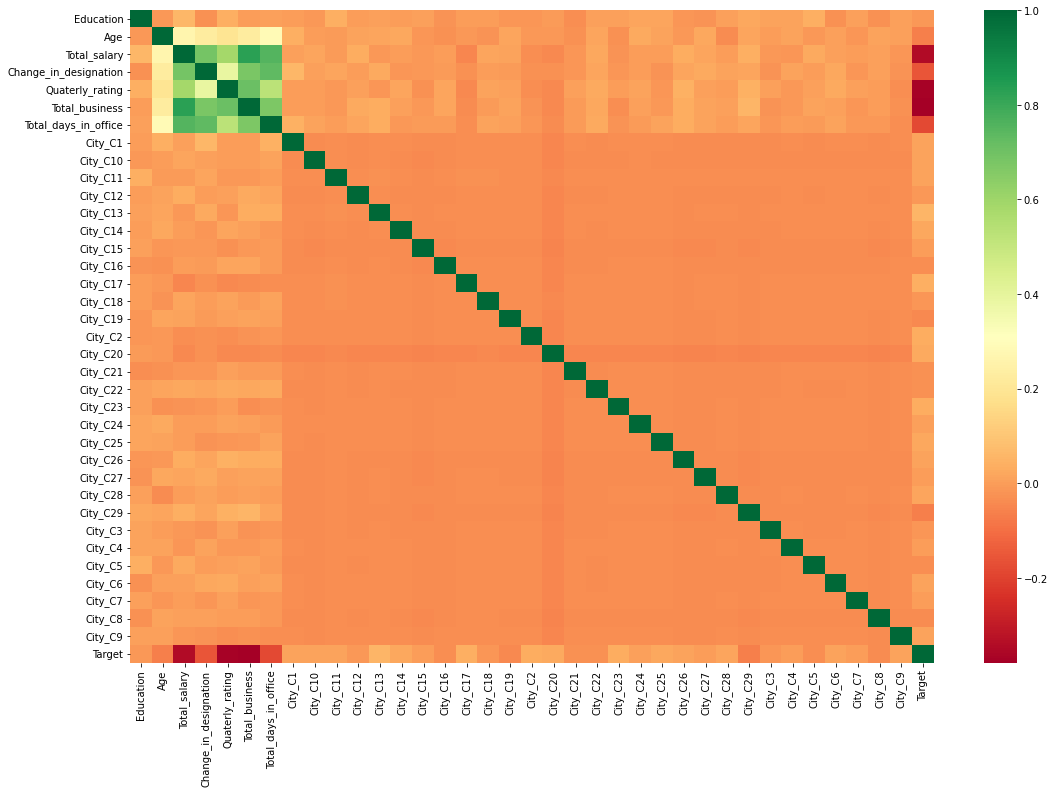

In [23]:
fig, ax = plt.subplots(1,1, figsize = (18,12))
sns.heatmap(train_df.corr(), cmap = 'RdYlGn')
plt.show()

In [24]:
# Test data cleaning

In [25]:
test['Reporting_date'] = pd.to_datetime(test['MMM-YY'])
test['Gender'] = pd.get_dummies(test['Gender'])

test['Education_Level'] =  test['Education_Level'].map({'Bachelor':2, 'College':1, 'Master':3}) 
test['Date_of_joining'] = test['Dateofjoining'].apply(lambda x : pd.to_datetime(x))
test['LastWorkingDate'].isnull().sum()

#filling nan values
test['LastWorkingDate'].fillna(0,inplace = True )

# setting target values by considering last day of job as leaving
test['target'] = test['LastWorkingDate'].apply(lambda x :   'working' if x==0 else 'resigned')

test['Last_Working_Date'] = test['LastWorkingDate'].apply(lambda x : pd.to_datetime(x))
test.drop(['MMM-YY','LastWorkingDate','Dateofjoining'],inplace = True , axis = 1)


min(test['Reporting_date'])
max(test['Reporting_date'])


Timestamp('2017-12-01 00:00:00')

In [26]:
test.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Reporting_date,Date_of_joining,target,Last_Working_Date
0,2,31,0,C7,3,67016,2,2,0,1,2017-11-01,2017-11-06,working,1970-01-01
1,2,31,0,C7,3,67016,2,2,0,1,2017-12-01,2017-11-06,working,1970-01-01
2,6,31,1,C11,2,78728,3,3,0,1,2017-08-01,2017-07-31,working,1970-01-01
3,6,31,1,C11,2,78728,3,3,0,1,2017-09-01,2017-07-31,working,1970-01-01
4,6,31,1,C11,2,78728,3,3,0,2,2017-10-01,2017-07-31,working,1970-01-01


In [27]:
# Feature Engineering.......

In [28]:
# Education level of each employee
education = test.groupby(['Emp_ID','City'])['Education_Level'].max()
education = education.to_frame(name = 'Education')
education = education.reset_index()
emp_id = education['Emp_ID']

# Average age of each employees
age = test.groupby(['Emp_ID'])['Age'].mean().round(2)
age = age.to_frame(name = 'Age')
age = age.reset_index()

# Total salary given to each employee
salary = test.groupby('Emp_ID')['Salary'].sum()
salary = salary.to_frame(name = 'Total_salary')
salary = salary.reset_index()

# Change in designation since joining
joining_designation = test.groupby('Emp_ID')['Joining Designation'].min()
current_designation = test.groupby('Emp_ID')['Designation'].max()
change_in_designation = current_designation - joining_designation
change_in_designation = change_in_designation.to_frame(name = 'Change_in_designation')
change_in_designation = change_in_designation.reset_index()

# Average quartely rating
quaterly_rating = test.groupby('Emp_ID')['Quarterly Rating'].mean().round(2)
quaterly_rating = quaterly_rating.to_frame(name = 'Quaterly_rating')
quaterly_rating = quaterly_rating.reset_index()

# Business done by each employee and its city
total_business =  test.groupby(['Emp_ID' ])['Total Business Value'].sum()
total_business = total_business.to_frame(name = 'Total_business')
total_business = total_business.reset_index()

# Total working in office since joining
joining_date = test.groupby('Emp_ID')['Date_of_joining'].min()
reporting_date =  test.groupby('Emp_ID')['Reporting_date'].max()
total_days_in_office = (reporting_date - joining_date).dt.days
total_days_in_office = total_days_in_office.to_frame(name = 'Total_days_in_office')
total_days_in_office = total_days_in_office.reset_index()

In [29]:
test_df = pd.concat([education,age,salary,change_in_designation,quaterly_rating,
                 total_business,total_days_in_office], axis=1)
test_df.drop('Emp_ID',axis = 1, inplace=True)

In [30]:
# test_df['Emp_ID'] = education['Emp_ID'] 

In [31]:
test_df.head()

,City,Education,Age,Total_salary,Change_in_designation,Quaterly_rating,Total_business,Total_days_in_office
0,C7,3,31.00,134032,0,1.00,0,25
1,C11,2,31.00,393640,0,1.60,1265000,123
2,C19,3,28.00,42172,0,1.00,0,-6
3,C26,1,39.00,59202,0,1.00,0,46
4,C24,2,29.67,2449848,2,3.75,36351110,1128


In [32]:
city_test = pd.get_dummies(test_df['City'] , prefix = 'City')
city_test.head()

,City_C1,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
test_df = pd.concat([test_df , city_test] ,axis = 1)

In [34]:
test_df.drop('City' , inplace=True , axis = 1)

In [35]:
test_df.head()

,Education,Age,Total_salary,Change_in_designation,Quaterly_rating,Total_business,Total_days_in_office,City_C1,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,3,31.00,134032,0,1.00,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,31.00,393640,0,1.60,1265000,123,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,28.00,42172,0,1.00,0,-6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,39.00,59202,0,1.00,0,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2,29.67,2449848,2,3.75,36351110,1128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
X = train_df.drop('Target' ,axis = 1)
y = train_df['Target']

In [37]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import cross_val_score

In [38]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# train_x = sc.fit_transform(X)
# test_df = sc.transform(test_df)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.25, random_state=42)

In [ ]:
features = [col_name for col_name in X_train.columns if col_name != 'target']

# cat_features = [col_name for col_name in features if X_train[col_name].dtype == 'object']

train_dataset = Pool(X_train, y_train , feature_names=features)

params = {
    'iterations': 1000, 
    'loss_function': 'MultiClass', 
    'train_dir': 'crossentropy',
    'allow_writing_files': False,
    'random_seed': 42,
}
# scores = cv(train_dataset,
#             params,
#             fold_count=5, 
#             plot="True")

model = CatBoostClassifier(**params)
model.fit(train_dataset, verbose=True, plot=True)


In [ ]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)


In [49]:
print("Accuracy:{:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f} %".format(accuracies.std()*100))

Accuracy:81.79 %
Standard Deviation:2.56 %


In [ ]:
prediction = model.predict(X_test)

In [ ]:
prediction

Text(0.5, 1.0, 'features importance')

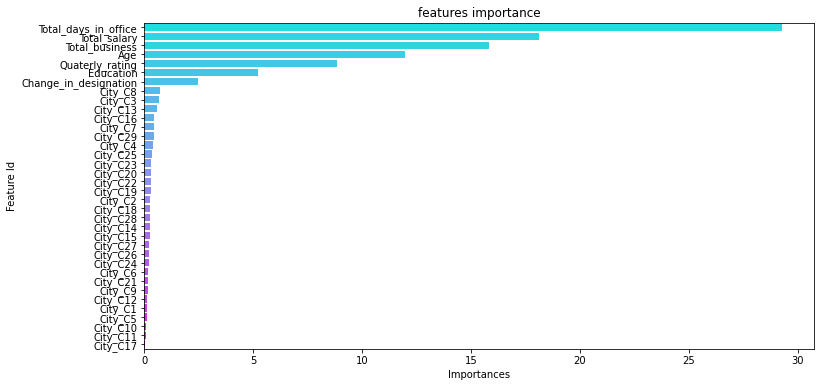

In [44]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(model.get_feature_importance(prettified=True))

#plotting feature importance
plt.figure(figsize=(12, 6))

feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool")

plt.title('features importance')

In [64]:
from xgboost import XGBClassifier


xgboost = XGBClassifier()



xgboost.fit(X_train,y_train)

y_pred = xgboost.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print(classification_report(y_test,y_pred))

accuracies = cross_val_score(estimator = xgboost, X = X_train, y = y_train, cv = 5)
print("Accuracy in xgboost:{:.2f} %".format(accuracies.mean()*100))


[[113  80]
 [ 37 366]]
              precision    recall  f1-score   support

           0       0.75      0.59      0.66       193
           1       0.82      0.91      0.86       403

    accuracy                           0.80       596
   macro avg       0.79      0.75      0.76       596
weighted avg       0.80      0.80      0.80       596

Accuracy in xgboost:82.58 %


In [65]:
submission_target = xgboost.predict(test_df)

In [66]:
predict_submit= [int(i) for i in submission_target]
submission = pd.read_csv('/content/drive/MyDrive/Employee Attrition/sample_.csv')
submission["Target"] = predict_submit
submission.to_csv('Submission_xg.csv', index=False)